<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/4_1_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 기본 셋팅

In [1]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (12,6)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}
lightgreen = {"facecolor": "lightgreen"}
gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


### 1) 함수
- 함수 : 입력 값을 출력 값으로 바꾸어 출력하는 관계
- 정의역(domain) : 함수에서 입력변수가 가질 수 있는 값의 집합
- 공역(range) : 출력변수가 가질 수 있는 값의 집합

In [2]:
# 함수 정의 및 사용
f = {
    1: 2,
    2: 4,
    3: 6,
    4: 8,
    5: 10,
}

f[1] 

2

### 2) 변수
- 변수(variable) : 어떤 숫자를 대표하는 기호
- 입력변수(input variable) : 입력 값을 대표하는 변수를 
- 출력변수(output variable) : 출력 값을 대표하는 변수
> $$
\begin{align}
f(x) = 2x
\end{align}
$$

In [3]:
# 함수 정의
def f(x):
    return 2 * x

# 함수 사용
x = 10
y = f(x)

print("f({}) = {}".format(x, y))

f(10) = 20


### 3) 연속과 불연속
- 불연속(discontinuous) : 함수의 값이 중간에 갑자기 변하는 것. 그렇지 않으면 연속(continuous)
- 대표 불연속 함수 : 부호함수, 단위계단함수, 지시함수

1. 부호함수 : 입력이 양수이면 1, 음수이면 -1, 0이면 0을 출력하는 $x=0$에서 불연속인 함수   
$$ 
\begin{align}
\text{sgn}(x) 
=
\begin{cases} 
1, & x > 0, \\ 
0, & x = 0, \\ 
-1, & x < 0 
\end{cases} 
\end{align}
$$

2. 단위계단함수 : $x=0$에서 불연속인 함수   

$$ 
\begin{align}
H(x) =
\begin{cases} 
1, & x \ge 0, \\ 
0, & x < 0  
\end{cases}
\end{align}
$$

3. 지시함수 : 미리 지정된 값이 들어오면 출력이 1이 되고 아니면 출력이 0

$$
\begin{align}
\mathbb{I}(x=i)
=
\begin{cases}
1 & \text{ if } x = i \\ 
0 & \text{ if } x \neq i \\ 
\end{cases}
\end{align}
$$


In [4]:
# 1. 부호 함수
np.sign(-0.0001), np.sign(0), np.sign(0.0001)

(-1.0, 0, 1.0)

In [5]:
# 2. 단위계산 함수
def heaviside_step(x):
    if isinstance(x, np.ndarray):
        return np.where(x >= 0, 1, 0)
    else:
        return 1.0 if x >= 0 else 0.0 

heaviside_step(-0.0001), heaviside_step(0), heaviside_step(0.0001)    

(0.0, 1.0, 1.0)

### 4) 역함수
- 역함수(inverse function) : 어떤 함수의 입력/출력 관계와 정반대의 입출력 관계를 갖는 함수
- 함수 $f$의 역함수는 $f^{-1}$ 기호로 표시한다.     
> $$ 
\begin{align}
y = f(x), \;\;\; \rightarrow \;\;\; x = f^{-1}(y) 
\end{align}
$$

- 함수의 "역함수"와 함수의 "역수"는 기호와 의미가 모두 다르다는 점에 주의한다.   
> $$ 
\begin{align}
f^{-1}(x) \neq f(x)^{-1} = \dfrac{1}{f(x)} 
\end{align}
$$

<br>

### 5) 함수의 그래프
- 맷플롯립으로 다음과 같은 함수의 그래프를 그려보자.

$$ 
\begin{align}
f(x) = x^3 - 3x^2 + x 
\end{align}
$$

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
[-5.    -1.375  0.    -0.125 -1.    -1.875 -2.    -0.625  3.   ]


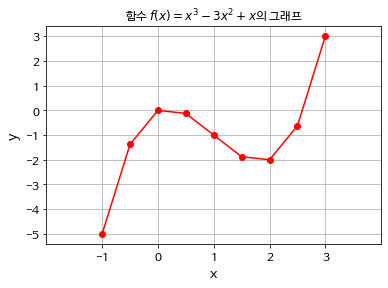

In [6]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 9)
print(x)

y = f(x)
print(y)

plt.plot(x, y, 'ro-')
plt.xlim(-2, 4)
plt.title("함수 $f(x) = x^3 - 3x^2 + x$의 그래프")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.show()

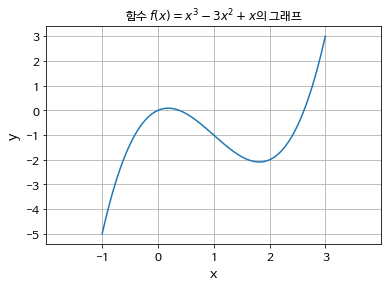

In [7]:
x = np.linspace(-1, 3, 400)
y = f(x)
plt.plot(x, y)

plt.xlim(-2, 4)
plt.title("함수 $f(x) = x^3 - 3x^2 + x$의 그래프")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.show()

#### 연습 문제 4.1.1

맷플롯립으로 부호함수와 단위계단함수의 라인플롯을 그려라.

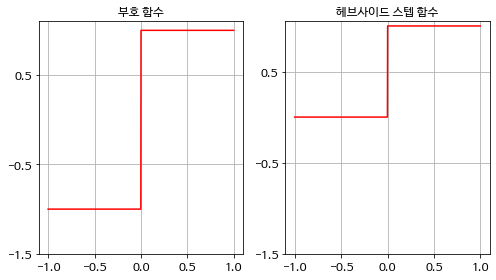

In [8]:
x = np.linspace(-1, 1, 1000)
sign = np.sign(x)
step = heaviside_step(x)

plt.figure(figsize=(7,4))
plt.subplot(121)
plt.plot(x, sign, 'r-')
plt.title("부호 함수")
plt.yticks(np.arange(-1.5, 1.5))

plt.subplot(122)
plt.plot(x, step, 'r-')
plt.title("헤브사이드 스텝 함수")
plt.yticks(np.arange(-1.5, 1.5))
plt.tight_layout()
plt.show()


### 6) 역함수의 그래프



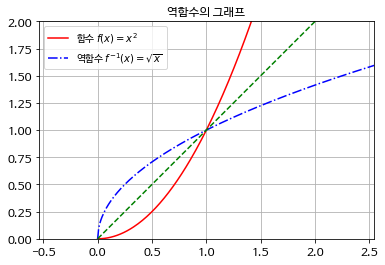

In [9]:
def f1(x):
    return x ** 2

def f1inv(x):
    return np.sqrt(x)


x = np.linspace(0, 3, 300)
plt.plot(x, f1(x), "r-", label="함수 $f(x) = x^2$")
plt.plot(x, f1inv(x), "b-.", label="역함수 $f^{-1}(x) = \sqrt{x}$")
plt.plot(x, x, "g--")
plt.axis("equal")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()
plt.title("역함수의 그래프")
plt.show()

### 7) 다항식함수

- 다항식(polynomial)함수 : 상수항 $c_0$, 일차항 $c_1x$, 이차항 $c_2x^2$, $\cdots$ 등의 거듭제곱 항의 선형조합으로 이루어진 함수   
> $$ 
\begin{align}
f(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_n x^n 
\end{align}
$$

<br>

### 8) 최대함수와 최소함수

- 최대함수 : 두 개의 인수 중에서 큰 값을 출력하는 함수이다.

$$ 
\begin{align}
\max(x, y) 
=
\begin{cases}
x & \text{ if } x \geq y \\
y & \text{ if } x < y 
\end{cases}
\end{align}
$$

- 최소함수 : 최대함수와 반대로 두 개의 인수 중 작은 값을 출력하는 함수

$$ 
\begin{align}
\min(x, y) 
=
\begin{cases}
x & \text{ if } x \leq y \\
y & \text{ if } x > y 
\end{cases}
\end{align}
$$

- ReLU(Rectified Linear Unit) : 최대함수는 원래 두 개의 입력을 갖는 함수이지만 보통 $y=0$으로 고정해서 입력값 $x$가 양수이면 그대로 출력하고 음수일 때는 0으로 만들 때 주로 사용한다.

$$ 
\begin{align}
\max(x, 0) 
=
\begin{cases}
x & \text{ if } x \geq 0 \\
0 & \text{ if } x < 0 
\end{cases}
\end{align}
$$


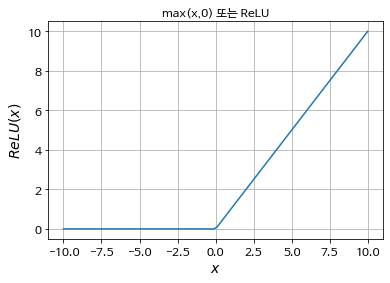

In [10]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.maximum(xx, 0))
plt.title("max(x,0) 또는 ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

### 9) 지수함수

- 지수함수(exponential function) : 거듭제곱을 할 때 아래에 있는 수를 밑(base)라고 하며, 밑을 오일러 수 $e$(약 2.718)로 하여 거듭제곱을 하는 함수   
> $$ 
\begin{align}
y = e^x = \exp (x) =\exp x 
\end{align}
$$

- 지수함수 특성
 * 양수($e$)를 거듭제곱한 값이므로 항상 양수다.
 * $x=0$일 때 1이 된다.
 * $x$가 양의 무한대로 가면($x \rightarrow \infty$), 양의 무한대로 다가간다.
 * $x$가 음의 무한대로 가면($x \rightarrow -\infty$), 0으로 다가간다.
 * $x_1 > x_2$이면 $\exp{x_1} > \exp{x_2}$이다.

- 두 지수함수의 곱의 값은 입력값 합의 지수함수 값과 같다.   
> $$ 
\begin{align}
f(x_1) \cdot f(x_2) = e^{x_1} \cdot e^{x_2} = e^{x_1 + x_2} = f(x_1 + x_2)
\end{align}
$$


In [11]:
np.e

2.718281828459045

In [12]:
np.exp(-10), np.exp(-1), np.exp(-0.1), np.exp(0), np.exp(0.1), np.exp(1), np.exp(10)

(4.5399929762484854e-05,
 0.36787944117144233,
 0.9048374180359595,
 1.0,
 1.1051709180756477,
 2.718281828459045,
 22026.465794806718)

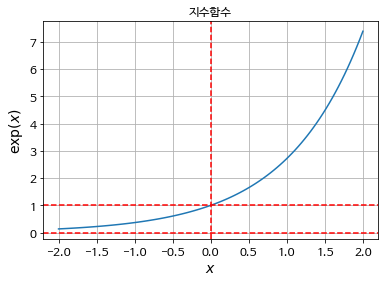

In [13]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)
plt.title("지수함수")
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()

In [14]:
np.exp(2 + 3), np.exp(2) * np.exp(3)

(148.4131591025766, 148.4131591025766)

### 10) 로지스틱 함수

- 로지스틱(logistic) 함수 : 지수함수를 변형한 함수. 시그모이드(sigmoid) 함수라는 종류의 하나이자 동의어로 쓰인다.   
> $$ \begin{align}
\sigma(x) = \dfrac{1}{1 + \exp(-x)} 
\end{align}
$$

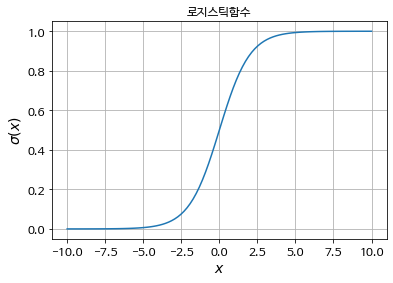

In [15]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx))
plt.title("로지스틱함수")
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")
plt.show()

### 11) 로그 함수

- 로그($\log a$) : $e$를 거듭제곱하여 특정한 수 $a$가 되도록 하는 수

In [16]:
np.exp(2.3025851)

10.000000070059542

In [17]:
np.log(10)

2.302585092994046

-  밑이 $e$가 아닌 경우에는 다음처럼 로그를 이용하여 계산할 수 있다.

$$ 
\begin{align}
y = a^x = (e^{\log a})^x = e^{x \log a} 
\end{align}
$$

- 로그는 지수함수의 출력이 특정한 값이 되게 하는 입력을 찾는 것이므로 지수함수의 역함수이다.

$$ 
\begin{align}
y = \log x 
\end{align}
$$

- 로그함수의 특징
 * $x$값, 즉 입력변수값이 양수이어야 한다. 0이거나 음수이면 정의되지 않는다.
 * $x > 1$면 $y > 0$ (양수)
 * $x = 1$이면 $y = 0$
 * $0 < x < 1$면 $y < 0$ (음수)
 * $x_1 > x_2$면 $\log{x_1} > \log{x_2}$이다.




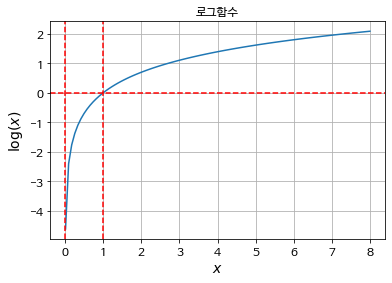

In [18]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.title("로그함수")
plt.plot(xx, yy)
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.axvline(1, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")
plt.show()

#### 연습 문제 4.1.2

$\log 2$의 값은 약 0.69, $\log 3$의 값은 약 1.10 이다. 이 때 $\log 12$의 값을 구하라.

In [19]:
np.log(12)

2.4849066497880004

#### 연습 문제 4.1.3

로지스틱함수의 역함수를 구하라.

- 답 :
$$ \begin{align}
\sigma(x) = \dfrac{1}{1 + \exp(-x)} 
\end{align}
$$
$$ \begin{align}
1 + \exp(-x) = \dfrac{1}{y}
\end{align}
$$
$$ \begin{align}
\exp(-x) = \dfrac{1}{y} - 1 = \dfrac{1-y}{y}
\end{align}
$$
$$ \begin{align}
\text{log exp(-x)} = -x = log\dfrac{1-y}{y}
\end{align}
$$
$$ \begin{align}
x = -log\dfrac{1-y}{y} = log\dfrac{y}{1-y}
\end{align}
$$
$$ \begin{align}
\sigma^{-1}(x) = log\dfrac{x}{1-x}
\end{align}
$$

- 로그함수의 성질 1: 로그함수는 곱하기를 더하기로 변환한다.

$$ 
\begin{align}
\log{(x_1 \cdot x_2)} = \log{x_1} + \log{x_2} 
\end{align}
$$

$$ 
\begin{align}
\log{\left(\prod_i x_i\right)} = \sum_i \left(\log{x_i}\right) 
\end{align}
$$

$$ 
\begin{align}
\log x^n = n \log x 
\end{align}
$$

- 로그함수의 성질 2: 어떤 함수에 로그를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다. 따라서 최적화할 때 원래의 함수가 아니라 로그를 취한 함수에 대해 최적화를 하는 경우가 많다.   
> $$ 
\begin{align}
\arg\max_x f(x) = \arg\max_x \log f(x)
\end{align}
$$
 - $\arg\max_x f(x)$는 $f$값을 최대로 만들어주는 $x$의 값을 뜻한다.

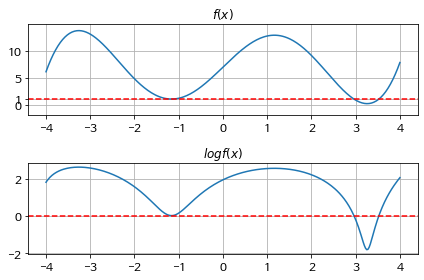

In [20]:
def ff(x):
    return x**3 - 12*x + 20 * np.sin(x) + 7

xx = np.linspace(-4, 4, 300)
yy = ff(xx)

plt.subplot(211)
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.yticks([0, 1, 5, 10])
plt.ylim(-2, 15)
plt.title("$f(x)$")

plt.subplot(212)
plt.plot(xx, np.log(yy))
plt.axhline(0, c='r', ls="--")
plt.title("$log f(x)$")

plt.tight_layout()
plt.show()

- 로그함수의 성질 3: 로그함수는 0부터 1사이의 작은 값을 확대시켜 보여준다.
 - 로그함수는 0부터 1사이의 구간을 음의 무한대부터 0까지로 확장시켜주기 때문에 확률값처럼 0과 1사이에 있는 작은 값을 더 확실하게 비교할 수 있도록 한다.

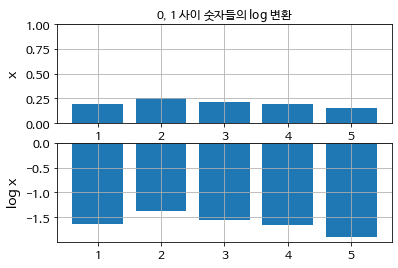

In [21]:
np.random.seed(0)
x = np.random.rand(5)
x = x / x.sum()

plt.subplot(211)
plt.title("0, 1 사이 숫자들의 $\log$ 변환")
plt.bar(range(1, 6), x)
plt.ylim(0, 1)
plt.ylabel("x")

plt.subplot(212)
plt.bar(range(1, 6), np.log(x))
plt.ylabel("log x")

plt.show()

### 12) 소프트플러스함수

- 소프트플러스(softplus) 함수 : 지수함수와 로그함수를 결합하여 만든 함수로 0을 인수로 갖는 최대함수와 비슷하지만 $x=0$ 근처에서 값이 부드럽게 변한다는 장점이 있다.    
> $$ 
\begin{align}
\zeta(x) = \log( 1 + \exp(x))
\end{align}
$$


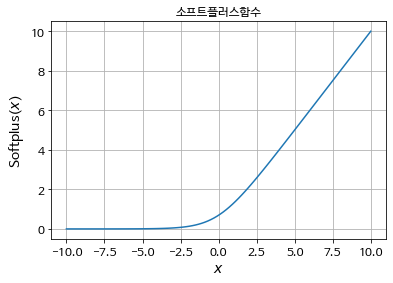

In [22]:
def softplus(x):
    return np.log(1 + np.exp(x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, softplus(xx))
plt.title("소프트플러스함수")
plt.xlabel("$x$")
plt.ylabel("Softplus($x$)")
plt.show()

### 13) 다변수함수

- 다변수함수multivariate function) : 복수의 입력변수를 가지는 함수 ($z$ : 2차원 (다변수)함수)   
> $$ 
\begin{align}
z = f(x, y) 
\end{align}
$$

- ex.위도 $x$와 경도 $y$를 입력받아 해발 고도 $z$를 출력하는 함수

- 따라서 2차원 함수는 평면상의 지형과 같기 때문에 3차원 서피스 플롯(surface plot), 또는 컨투어 플롯(contour plot)으로 나타낼 수 있다.

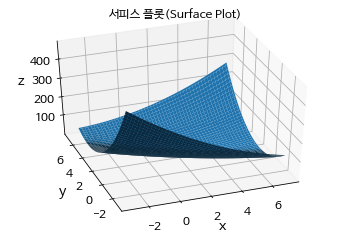

In [28]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-3, 7, 100)
yy = np.linspace(-3, 7, 100)
X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

fig = plt.figure()

ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0.1)
ax.view_init(40, -110)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title("서피스 플롯(Surface Plot)")
plt.show()

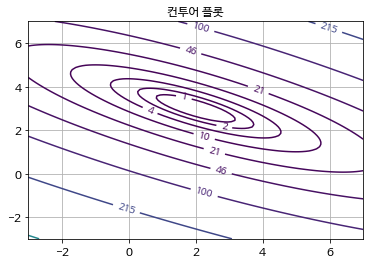

In [24]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10))
plt.clabel(CS, fmt="%d")
plt.title('컨투어 플롯')
plt.show()

### 14) 분리 가능 다변수함수

- 분리 가능 다변수함수(separable multivariate function) : 단변수함수의 곱으로 표현 가능   
> $$ 
\begin{align}
f(x, y) = f_1(x) f_2(y)
\end{align}
$$

- 2차원 함수는 3차원 공간상의 지형에 비유할 수 있다. 2차원 함수에서 $x$ 값을 어떤 상수 $x_0$로 고정 $y$ 값을 어떤 상수 $y_0$로 고정하자.
> $$
\begin{align}
x=x_0 \;\; \text{or} \;\; y=y_0
\end{align}
$$

- 움직일 수 있는 변수가 이제 하나이므로 이 함수는 1차원 단변수함수가 된다. 이 단변수함수의 모양은 3차원 공간상의 지형을 케이크 자르듯이 나눌 때 생기는 단면의 모양과 같다.

- 분리 가능 다변수함수는 단면의 모양이 모두 같다.  예를 들어 $x=x_0$로 고정하면 단면 함수는 다음과 같으므로 이므로 $x_0$의 값과 상관없이 $g(y)$의 높이만 조절한 모양이 된다.   
> $$ 
\begin{align}
g(x_0,y) = g(x_0)g(y) = k_0 g(y)
\end{align}
$$



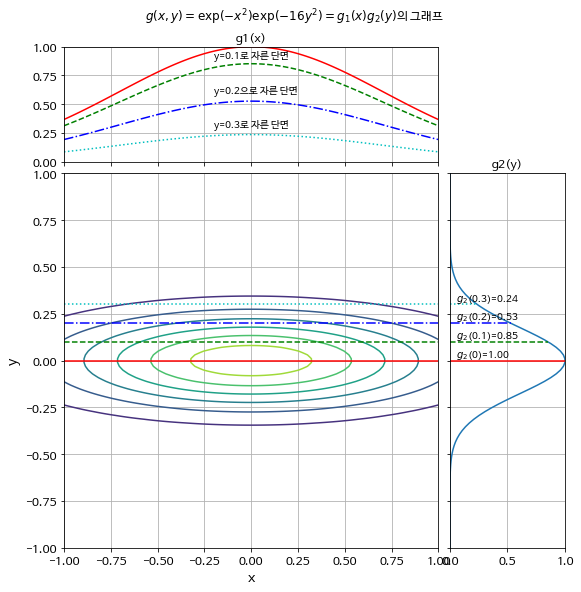

In [29]:
from matplotlib import transforms
from matplotlib.ticker import NullFormatter

def g1(x):
    return np.exp(-x ** 2)


def g2(y):
    return np.exp(-16 * y ** 2)


def g(x, y):
    return g1(x) * g2(y)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z = g(X, Y)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02
rect = [left, bottom, width, height]
rectx = [left, bottom_h, width, 0.2]
recty = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8, 8))
ax = plt.axes(rect)
axx = plt.axes(rectx)
axy = plt.axes(recty)

nullfmt = NullFormatter()
axx.xaxis.set_major_formatter(nullfmt)
axy.yaxis.set_major_formatter(nullfmt)

ax.contour(X, Y, Z)
ax.axhline(0, c='r', ls="-")
ax.axhline(0.1, c='g', ls="--")
ax.axhline(0.2, c='b', ls="-.")
ax.axhline(0.3, c='c', ls=":")
ax.set_xlabel("x")
ax.set_ylabel("y")

axx.plot(xx, g1(xx), c='r')
axx.plot(xx, g2(0.1) * g1(xx), c='g', ls="--")
axx.plot(xx, g2(0.2) * g1(xx), c='b', ls="-.")
axx.plot(xx, g2(0.3) * g1(xx), c='c', ls=":")
axx.set_title("g1(x)")
axx.text(-0.2, 0.3, "y=0.3로 자른 단면")
axx.text(-0.2, 0.6, "y=0.2으로 자른 단면")
axx.text(-0.2, 0.9, "y=0.1로 자른 단면")

base = axy.transData
rot = transforms.Affine2D().rotate_deg(-90)
axy.plot(yy, g2(yy), transform=rot + base)
axy.set_title("g2(y)")
axy.axhline(0, xmax=g2(0), c='r', ls="-")
plt.text(0.05, 0.02, "$g_2$(0)={:.2f}".format(g2(0)))
axy.axhline(0.1, xmax=g2(0.1), c='g', ls="--")
plt.text(0.05, 0.12, "$g_2$(0.1)={:.2f}".format(g2(0.1)))
axy.axhline(0.2, xmax=g2(0.2), c='b', ls="-.")
plt.text(0.05, 0.22, "$g_2$(0.2)={:.2f}".format(g2(0.2)))
axy.axhline(0.3, xmax=g2(0.3), c='c', ls=":")
plt.text(0.05, 0.32, "$g_2$(0.3)={:.2f}".format(g2(0.3)))

axx.set_xlim(ax.get_xlim())
axx.set_ylim(0, 1)
axy.set_ylim(ax.get_ylim())
axy.set_xlim(0, 1)

plt.suptitle("$g(x, y) = \exp(-x^2)\exp(-16y^2) = g_1(x)g_2(y)$의 그래프", y=1.04)
plt.show()

### 15) 다변수 다출력 함수

- 소프트맥스(softmax)함수 : 다차원 벡터를 입력받아 다차원 벡터를 출력한다. 다음은 3차원 소프트맥스 함수이다.

$$ 
\begin{align}
y =
\begin{bmatrix}
y_1 \\ y_2 \\ y_3
\end{bmatrix}
=S(x_1, x_2, x_3) = 
\begin{bmatrix}
\dfrac{\exp(w_1x_1)}{\exp(w_1x_1) + \exp(w_2x_2) + \exp(w_3x_3)} \\
\dfrac{\exp(w_2x_2)}{\exp(w_1x_1) + \exp(w_2x_2) + \exp(w_3x_3)} \\
\dfrac{\exp(w_3x_3)}{\exp(w_1x_1) + \exp(w_2x_2) + \exp(w_3x_3)} \\
\end{bmatrix}
\end{align}
$$

- 출력 벡터는 다음과 같은 특성을 갖는다. 
 * 모든 출력 원소는 0와 1 사잇값을 갖는다.
 * 모든 출력 원소의 합은 1이다.
 * 입력 원소의 크기 순서와 출력 원소의 크기 순서가 같다.

- 소프트맥스함수는 다변수 입력을 확률(probability)처럼 보이게 출력. 이러한 특성 때문에 인공신경망의 마지막단에서 출력을 조건부확률로 변형하는 데 사용된다.

In [30]:
def softmax(x, w):  # x는 1차원 배열, w는 가중치 벡터
    e = np.exp(w * x)
    return np.exp(w * x) / e.sum()

x = [2.0, 1.0, 0.5]
y = softmax(x, np.ones(3))
y

array([0.62853172, 0.2312239 , 0.14024438])

In [31]:
np.sum(y)

1.0

In [33]:
# 가중치가 커지면 최대값과 최소값의 차이가 더 벌어진다.

softmax(x, 4 * np.ones(3))

array([0.97962921, 0.01794253, 0.00242826])

### 16) 함수의 평행이동

- 단변수함수를 그래프 상에서 **오른쪽**으로 $a$만큼 평행이동하려면 다음과 같이 함수식을 바꾸면 된다.
> $$
\begin{align}
f(x) \;\; \rightarrow \;\; f(x-a)
\end{align}
$$

- ex.
> $$
\begin{align}
f(x) = x^2 + 2x
\end{align}
$$
$$
\begin{align}
f(x-2) = (x-2)^2 + 2(x-2)
\end{align}
$$

- 단변수함수를 그래프 상에서 **위로** $b$만큼 평행이동하려면 다음과 같이 함수식을 바꾼다.
> $$
\begin{align}
f(x) \;\; \rightarrow \;\; f(x) + b
\end{align}
$$

- 다변수함수를 오른쪽으로 a만큼, 위로 b만큼 평행이동할 때는 함수를 다음처럼 변형한다.
> $$
\begin{align}
f(x, y) \;\; \rightarrow \;\; f(x-a, y-b)
\end{align}
$$

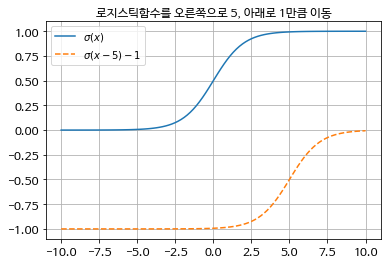

In [34]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx), label="$\sigma(x)$", ls="-")
plt.plot(xx, logistic(xx-5)-1, label="$\sigma(x-5)-1$", ls="--")
plt.legend()
plt.title("로지스틱함수를 오른쪽으로 5, 아래로 1만큼 이동")
plt.show()

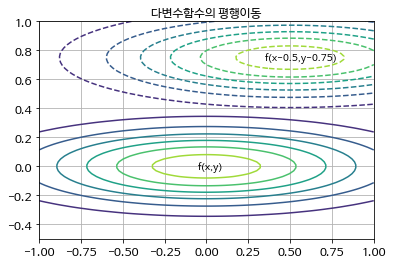

In [35]:
def g(x, y):
    return np.exp(-x ** 2 -16 * y ** 2)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z1 = g(X, Y)
Z2 = g(X-0.5, Y-0.75)
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2, linestyles="--")
plt.text(-0.05, -0.02, "f(x,y)")
plt.text(0.35, 0.73, "f(x-0.5,y-0.75)")
plt.ylim(-0.5, 1)
plt.title("다변수함수의 평행이동")
plt.show()

### 17) 함수의 스케일링

- 단변수함수를 x축 방향으로 a배만큼 늘릴려면 함수를 다음처럼 변형한다.
> $$
\begin{align}
f(x) \;\; \rightarrow \;\; f\left(\frac{x}{a}\right)
\end{align}
$$

- 단변수함수를 y축 방향으로 b배만큼 늘릴려면 함수를 다음처럼 변형한다.
> $$
\begin{align}
f(x) \;\; \rightarrow \;\; bf(x)
\end{align}
$$


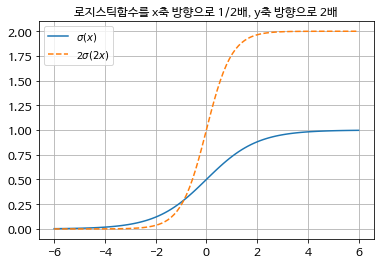

In [36]:
xx = np.linspace(-6, 6, 100)
plt.plot(xx, logistic(xx), label="$\sigma(x)$", ls="-")
plt.plot(xx, 2*logistic(2*xx), label="2$\sigma(2x)$", ls="--")
plt.legend()
plt.title("로지스틱함수를 x축 방향으로 1/2배, y축 방향으로 2배")
plt.show()